In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv
import datetime as dt
import re
import time
import dateutil


headers = ['datetime','instanceId','maxCPUPercent']
data = '/home/joe/data/aws/out.txt'
df = pd.read_csv(data, names=headers)
df.head(10)

,datetime,instanceId,maxCPUPercent
0,2020-03-23 20:40:00+00:00,i-0ca364ec6656ff517,0.169492
1,2020-03-23 22:45:00+00:00,i-0ca364ec6656ff517,0.166667
2,2020-03-23 18:20:00+00:00,i-0ca364ec6656ff517,0.169492
3,2020-03-23 19:30:00+00:00,i-0ca364ec6656ff517,0.166667
4,2020-03-23 19:45:00+00:00,i-0ca364ec6656ff517,0.166667
5,2020-03-23 20:55:00+00:00,i-0ca364ec6656ff517,0.163934
6,2020-03-23 18:35:00+00:00,i-0ca364ec6656ff517,0.166667
7,2020-03-24 02:15:00+00:00,i-0ca364ec6656ff517,0.983607
8,2020-03-23 23:00:00+00:00,i-0ca364ec6656ff517,0.166667
9,2020-03-23 22:30:00+00:00,i-0ca364ec6656ff517,0.169492


In [3]:
print(df.describe())
dfG = df.groupby('instanceId')['maxCPUPercent'].mean()
#instances = df.instanceId.unique()
print(dfG)
#print(instances)
print(df['datetime'].max())
print(df['datetime'].min())

       maxCPUPercent
count     127.000000
mean        2.065994
std         3.899760
min         0.163934
25%         0.166667
50%         0.169492
75%         3.333333
max        33.166667
instanceId
i-089389afc8097dac4    0.501436
i-09f0182499b5eaf27    4.235662
i-0ca364ec6656ff517    0.514968
Name: maxCPUPercent, dtype: float64
2020-03-24 15:25:00+00:00
2020-03-23 17:50:00+00:00


In [4]:
dfP = df.pivot(index=df['datetime'], columns='instanceId')['maxCPUPercent']
dfP = dfP.fillna(0)
dfP = dfP.reset_index()
dfP['timestamps'] = pd.to_datetime(dfP['datetime'])
pattern = r':00\+00:00'
dfP = dfP.replace(to_replace=pattern, value='', regex=True)
dfP.head(4)
dfP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   datetime             60 non-null     object             
 1   i-089389afc8097dac4  60 non-null     float64            
 2   i-09f0182499b5eaf27  60 non-null     float64            
 3   i-0ca364ec6656ff517  60 non-null     float64            
 4   timestamps           60 non-null     datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(3), object(1)
memory usage: 2.5+ KB


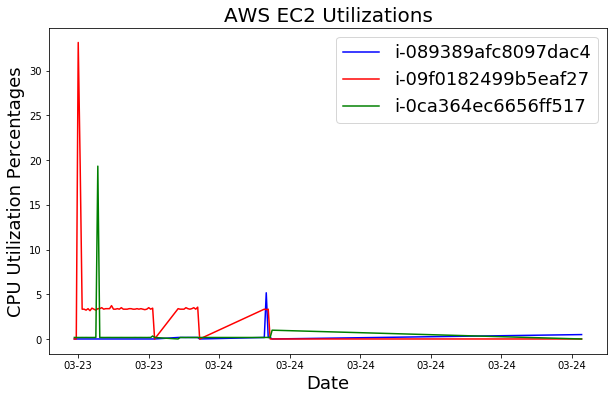

In [6]:
datestrings = dfP['datetime'].to_list()
dates = [dateutil.parser.parse(s) for s in datestrings]

fig = plt.figure(figsize=(10,6))
ax=plt.gca()

ax.set_title("AWS EC2 Utilizations", fontsize=20)
ax.set_ylabel('CPU Utilization Percentages', color='black',fontsize=18)
ax.set_xlabel('Date', color='black',fontsize=18)
#ax.set_xticks(dates)
xfmt = mdates.DateFormatter('%m-%d')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(dates,dfP['i-089389afc8097dac4'], color="blue")
plt.plot(dates,dfP['i-09f0182499b5eaf27'], color="red")
plt.plot(dates,dfP['i-0ca364ec6656ff517'], color="green")
plt.legend(['i-089389afc8097dac4','i-09f0182499b5eaf27','i-0ca364ec6656ff517'], fontsize=18)
plt.show()